# PROBLEM STATEMENT

# Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

# Step 1  :  Importing relevent libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Step 2 : Import train and test data

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [3]:
train.shape, test.shape

((245725, 11), (105312, 10))

**We have 245725 rows and 11 columns in Train set.**
**Test set has 105312 rows and 10 columns.**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
train['Is_Lead']=train.Is_Lead.astype('category')

In [6]:
train.dtypes

ID                       object
Gender                   object
Age                       int64
Region_Code              object
Occupation               object
Channel_Code             object
Vintage                   int64
Credit_Product           object
Avg_Account_Balance       int64
Is_Active                object
Is_Lead                category
dtype: object

In [7]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [8]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# Step 3 : Data preperation

In [9]:
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [10]:
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

**In both train and test data 11.93% and 11.89% of "Credit_Product" data is missing respectively.**

In [11]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
print('Categorical columns in Train Set: \n',categorical.columns)


#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("\n\nNumerical Features in Train Set:",numerical.shape[1])
print('Numerical Features in Train Set: \n',numerical.columns)

Categorical Features in Train Set: 7
Categorical columns in Train Set: 
 Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')


Numerical Features in Train Set: 3
Numerical Features in Train Set: 
 Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')


In [12]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
print('Categorical columns in Train Set: \n',categorical.columns)


#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("\n\nNumerical Features in Train Set:",numerical.shape[1])
print('Numerical Features in Train Set: \n',numerical.columns)


Categorical Features in Train Set: 7
Categorical columns in Train Set: 
 Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')


Numerical Features in Train Set: 3
Numerical Features in Train Set: 
 Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')


In [13]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [14]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

**Credit_product has missing values in both train and test sets. Lets analyse the column**

__4.1 Train set- Credit_Product__

In [15]:
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

**Credit_Product is a categorical column, we can either choose mode imputation or KNN imputation.**

**I choose Mode imputation, since only one column needs to be imputed**

In [16]:
train['Credit_Product'].mode()[0]

'No'

In [17]:
test['Credit_Product'].mode()[0]

'No'

**We can see that 'No' is the mode(Most repeated value) in the  train and test data**

**Let's impute mode in the Credit_Product column.**

In [18]:
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [19]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [20]:
test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

**There is no null values, the data is ready for exploration.**

# Step 4: Exploratory Data Analysis

In [21]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [22]:

# Distribution of classes
train.groupby('Is_Lead').size()

Is_Lead
0    187437
1     58288
dtype: int64

Understanding based on Gender


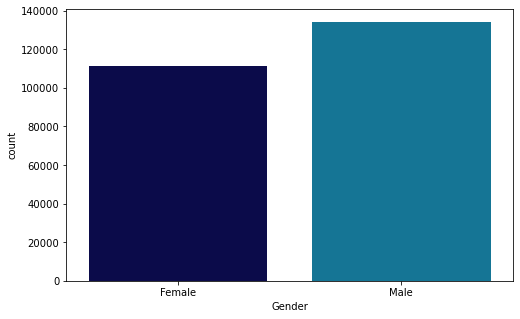

In [23]:
print('Understanding based on Gender')

plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

**We can see that, Male customers are more**


The total number of regions are  35


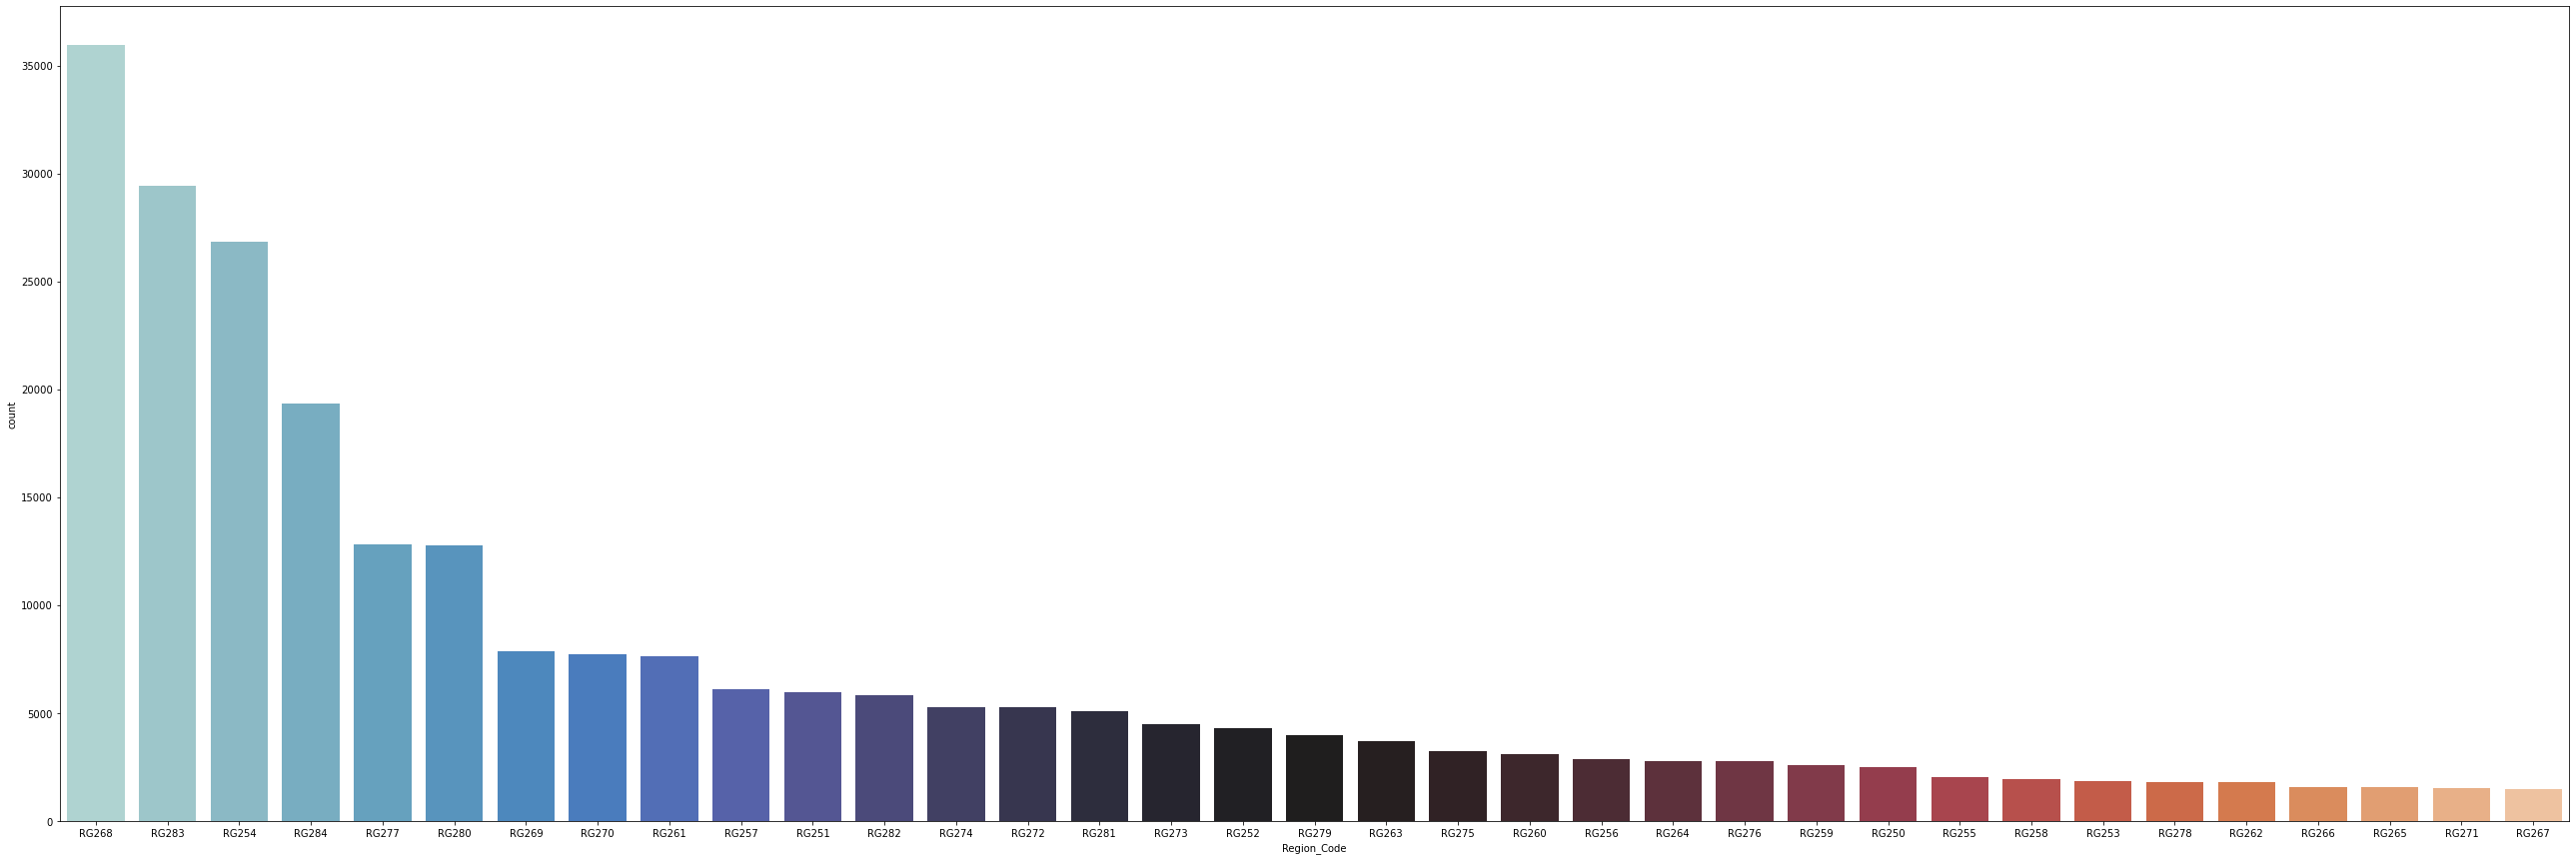

In [24]:
print('\nThe total number of regions are ',train['Region_Code'].nunique())
plt.figure(figsize=(45,15))
sns.countplot('Region_Code',data=train,palette='icefire',order = train['Region_Code'].value_counts().index)

**Top three customer regions codes are RG268,RG283,RG254 out of 35 regions**

The customers have  4  kinds of occupation categories


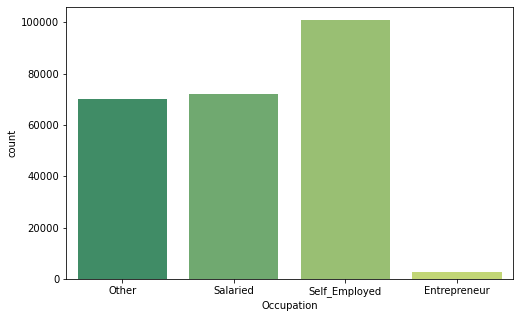

In [25]:
print('The customers have ',train['Occupation'].nunique(),' kinds of occupation categories')

plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='summer')

**Most of the customers are self-employed**


The customers are categorised into  4  Channel codes.


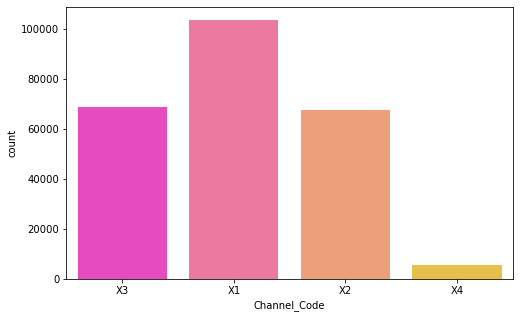

In [26]:
print('\nThe customers are categorised into ',train['Channel_Code'].nunique(),' Channel codes.')

plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='spring')

**Most of the customers belong to X1 Customer Acquisition Channel**


Analysis based on Credit_Products


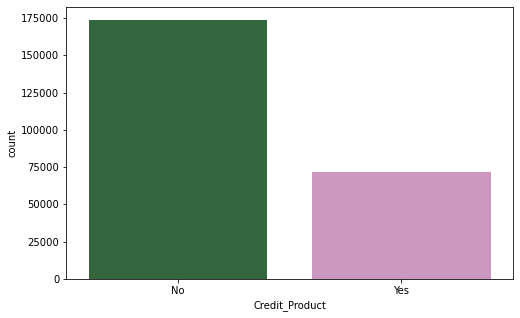

In [27]:
print('\nAnalysis based on Credit_Products')

plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='cubehelix')

**Many people do not owe credit products**

In [28]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0


In [29]:
train.corr(method='pearson')

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


0.14281996489855647


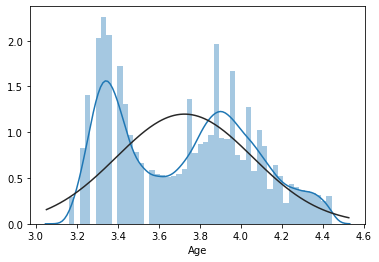

In [52]:
import scipy.stats as stats
sns.distplot(train['Age'],fit=stats.norm)
print(train['Age'].skew())

**Age is moderately skewed which will affect model performance lets apply log transform**

0.03476139891511975


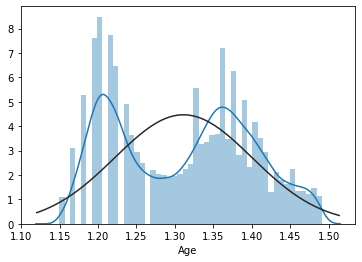

<Figure size 432x288 with 0 Axes>

In [53]:
train['Age'] = np.log(train['Age'])
print(train['Age'].skew())
sns.distplot(train['Age'], fit=stats.norm)
fig = plt.figure()

0.7901885721179357


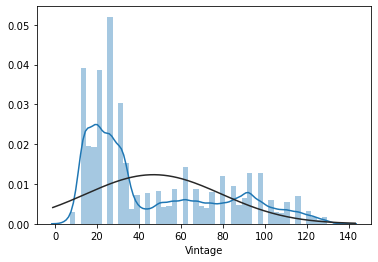

In [55]:
print(train['Vintage'].skew())
sns.distplot(train['Vintage'],fit=stats.norm)

**Vinatge is moderately skewed, yet it will affect the performance of the model, hence lets apply log transform**

0.10966289434574678


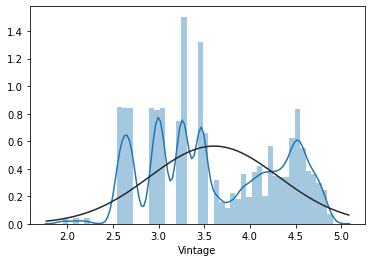

<Figure size 432x288 with 0 Axes>

In [56]:
train['Vintage'] = np.log(train['Vintage'])
print(train['Vintage'].skew())
sns.distplot(train['Vintage'], fit=stats.norm)
fig = plt.figure()

2.968726515557337


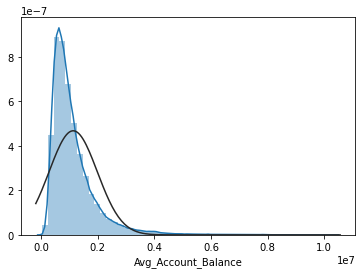

In [57]:
sns.distplot(train['Avg_Account_Balance'],fit=stats.norm)
print(train['Avg_Account_Balance'].skew())


**Average Account Balance is highly skewed(Right skewed).Lets apply log tranform and reduce the skewness**

0.2351775282236966


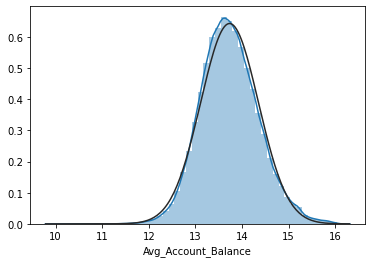

<Figure size 432x288 with 0 Axes>

In [58]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
print(train['Avg_Account_Balance'].skew())
sns.distplot(train['Avg_Account_Balance'], fit=stats.norm)
fig = plt.figure()

<Figure size 1440x1440 with 0 Axes>

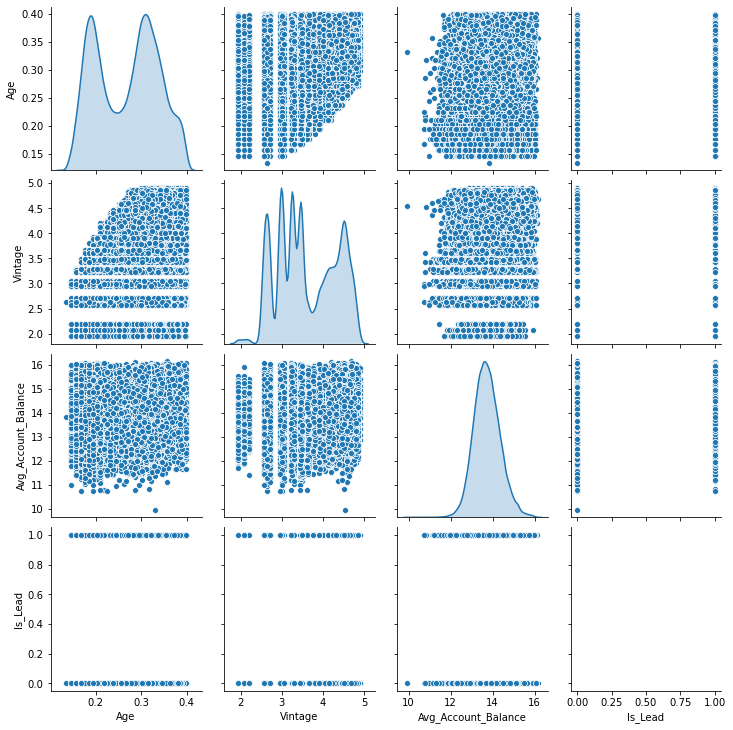

In [59]:
plt.figure(figsize=(20,20))
sns.pairplot(train,diag_kind='kde')

# Step 5 : Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [61]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [62]:
# Seperate Features and Target
X= train.drop(columns = ['Is_Lead'], axis=1)  # input
Y= train['Is_Lead']                           # target

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X) # Applying the Standardization function 
standardX = scaler.transform(X)

In [64]:
print("Original Data: nn", train.values)
print("nStandardized Data: nn", standardX[0:11,:])

Original Data: nn [[179194 0 0.37596339606073864 ... 13.860193250390495 0 0]
 [131013 0 0.20222837858126022 ... 13.274205107944308 0 0]
 [121520 0 0.3311813241348132 ... 14.210463944335558 1 0]
 ...
 [111270 0 0.16648273292699992 ... 13.416016090056788 0 0]
 [111156 0 0.18534539706456757 ... 12.917806027565799 0 0]
 [60342 1 0.19401129636889014 ... 13.93708727738286 0 0]]
nStandardized Data: nn [[ 0.79413886 -1.09693134  1.57354975 -0.17238886 -1.29227941  1.23992486
   0.21954816 -0.64404838  0.20455173 -0.79687242]
 [ 0.1149085  -1.09693134 -0.97192755  0.65582975 -0.12097483 -1.02037519
  -0.19867596 -0.64404838 -0.74096212 -0.79687242]
 [-0.01891881 -1.09693134  0.91742556 -0.17238886  1.05032976  1.23992486
  -0.49258563 -0.64404838  0.76972664  1.25490602]
 [-0.92463917  0.91163408 -0.54564691  0.01165972 -0.12097483 -1.02037519
  -0.93656209 -0.64404838 -1.08424489 -0.79687242]
 [ 1.22281483 -1.09693134 -0.97192755  1.11595121 -0.12097483 -1.02037519
  -0.15511924 -0.64404838 -0

In [65]:

# Logistic Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [66]:
#loading data 
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,179194,0,0.375963,18,1,2,3.761200,0,13.860193,0,0
1,131013,0,0.202228,27,2,0,3.465736,0,13.274205,0,0
2,121520,0,0.331181,18,3,2,3.258097,0,14.210464,1,0
3,57273,1,0.231323,20,2,0,2.944439,0,13.061453,0,0
4,209602,0,0.202228,32,2,0,3.496508,0,13.695360,0,0


In [67]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,29,4,1,0,25,1,742366,0
1,28747,1,43,18,1,1,49,0,925537,0
2,94883,1,31,20,2,0,14,0,215949,0
3,90941,1,29,22,1,0,33,0,868070,0
4,87803,0,29,20,1,0,19,0,657087,0


In [68]:
# Setting parameters
num_folds = 10
seed = 7

# Separating data into folds for Cross-Validation 
kfold = KFold(num_folds, True, random_state = seed)

# Creating model
model = LogisticRegression()

# Cross Validation - Scoring = 'accuracy'
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')
print("ROC_AUC: %.3f" % (result.mean() * 100))

ROC_AUC: 50.578


In [69]:
# Setting parameters
num_folds = 10
seed = 7

# Separating data into folds for Cross-Validation
kfold = KFold(num_folds, True, random_state = seed)

# Creating Logistic Regression model
model = LogisticRegression()

# Cross Validation - scoring ='roc_auc'
result = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Apllying the average for the result
print("AUC: %.3f" % (result.mean() * 100))

AUC: 50.578


In [70]:
# Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Setting parameters
test_size = 0.33
seed = 7

# Creating train and test datasets instead cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

# Creating model
model = LogisticRegression()

# Training model
model.fit(X_train, Y_train) 

# Making predictions
predictions = model.predict(X_test) 
matrix = confusion_matrix(Y_test, predictions)

# Printing confusion matrix
print(matrix)

report = classification_report(Y_test, predictions)
print(report)

[[61864     0]
 [19226     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     61864
           1       0.00      0.00      0.00     19226

    accuracy                           0.76     81090
   macro avg       0.38      0.50      0.43     81090
weighted avg       0.58      0.76      0.66     81090



LR: 0.517623 (0.070664)
LDA: 0.713687 (0.002075)
NB: 0.660382 (0.003641)
KNN: 0.506176 (0.002707)
CART: 0.607328 (0.004119)


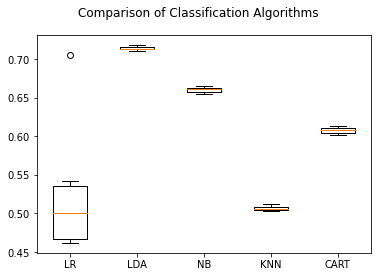

In [71]:
# Importing all algorithms used
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Setting parameters
num_folds = 10
seed = 7

# Creating empty list 
models = []

# Machine Learning Algorithms list
models.append(('LR', LogisticRegression())) #binary class
models.append(('LDA', LinearDiscriminantAnalysis())) #binary class
models.append(('NB', GaussianNB())) # binary class
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier()))

# Evaluating each model in a loop
results = [] # result list
names = []   # names list
for name, model in models: 
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, 
                                 X, 
                                 Y, 
                                 cv = kfold, 
                                 scoring = 'roc_auc')

    results.append(cv_results) 
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot results
fig = plt.figure()
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
#Model Optimization

# Grid Search Parameter Tuning
from pandas import read_csv
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression


# Setting Hyperparameters
grid_values = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1,10,100,1000]}

# Creating model
model = LogisticRegression()

# Creating grid
grid = GridSearchCV(estimator = model, param_grid = grid_values)

# Training grid
grid.fit(X, Y)
print("Accuracy: %.3f" % (grid.best_score_ * 100))
print("Best Model Parameters:", grid.best_estimator_)


Accuracy: 76.279
Best Model Parameters: LogisticRegression(C=0.001)


In [ ]:
# Bagged Decision Tree
from pandas import read_csv
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier


# Setting parameters
num_folds = 10 
seed = 7

# Separating data into folds for Cross-Validation
kfold = KFold(num_folds, True, random_state = seed)

# Creating model
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator = cart, 
                          n_estimators = num_trees, 
                          random_state = seed)
result = cross_val_score(model, X, Y, cv = kfold,estimator='roc_auc')
print("Bagged Decision Tree ROC_AUC: %.3f" % (result.mean() * 100))

In [ ]:
# Random Forest Classifier
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



#Setting parameters
num_folds = 10
seed = 7

# Setting trees
num_trees = 100
max_features = 3

# Separating data into folds for Cross-Validationk
fold = KFold(num_folds, True, random_state = seed)

# Creating Model
model = RandomForestClassifier(n_estimators = num_trees,
                               max_features = max_features)
# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold,estimator='roc_auc')

# Print Result
print("Random Forst ROC_AUC: %.3f" % (result.mean() * 100))

In [ ]:
# AdaBoost Classifier Model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Setting parameters
num_folds = 10
seed = 7

# Setting trees
num_trees = 30

# Separating data into folds for Cross-Validation
kfold = KFold(num_folds, True, random_state = seed)

# Creating model
model = AdaBoostClassifier(n_estimators = num_trees, 
                            random_state = seed)
# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold,estimator='roc_auc')
# Print Result
print("AdaBoost Classifier ROC_AUC: %.3f" % (result.mean() * 100))


In [ ]:
# Stochastic Gradient Boosting
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Setting parameters
num_folds = 10
seed = 7

# Setting number of tress
num_trees = 100

# Separating data into folds for Cross-Validation
kfold = KFold(num_folds, True, random_state = seed)

# Creating model
model = GradientBoostingClassifier(n_estimators = num_trees,random_state = seed)

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold,estimator='roc_auc')

# Print result
print("Gradient Boosting Classifie ROC_AUC: %.3f" % (result.mean() * 100))

In [ ]:
# Voting Ensemble
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [ ]:
# Setting parameters
num_folds = 10
seed = 7

# Separating data into folds for Cross-Validation
kfold = KFold(num_folds, True, random_state = seed)

# Creating empty list
estimators = []

# Logistic Regression Model
model1 = LogisticRegression() 
estimators.append(('logistic', model1))

# Decision Tree Classifier Model
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

# Creating ensemble model passing the list into VotingClassifier
ensemble = VotingClassifier(estimators)

# Cross Validation
result = cross_val_score(ensemble, X, Y, cv = kfold,estimator='roc_auc')


In [ ]:

# Print Result
print(result.mean() * 100)

In [ ]:
!pip install xgboost

In [ ]:
# XGBoost Classifier
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# Setting parameters
num_folds = 10
seed = 7

# Creating train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

# Creating model
model = XGBClassifier()

# Cross Validation
result = cross_val_score(model, X, Y, cv = kfold,estimator='roc_auc')

# Print result
print("XGB Classifie ROC_AUC: %.3f" % (result.mean() * 100))




In [ ]:
model1 = XGBClassifier()
model1.fit(X, Y)
final_predictions = model1.predict(test)

In [ ]:
import csv

dataframe=pd.DataFrame(test, columns=['ID']) 
dataframe['Is_Lead'] = final_predictions
print (dataframe)
dataframe.to_csv('predictions_lead1.csv')

In [ ]:
model2 = GradientBoostingClassifier(n_estimators = num_trees,random_state = seed)
model2.fit(X, Y)
final_predictions = model2.predict(test)

In [ ]:
import csv

dataframe=pd.DataFrame(test, columns=['ID']) 
dataframe['Is_Lead'] = final_predictions
print (dataframe)
dataframe.to_csv('predictions_lead2.csv')